In [1]:
library(stringr)
library(readxl)
# If tidyverse working no need to activate all below seperately just activate tidyverse i.e library(tidyverse)
library(dplyr)
library(tidyr)
library(ggplot2)
library(purrr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# 1
## 1A
- Explain the various options that can be used to create a matrix command

In [12]:
x = c(1,2,3,4,5,6,7,8,9)
y = c(10,11,12,13,14,15,16,17,18,19)
mat1 = matrix(x,nrow = 3,ncol = 3,byrow = TRUE)
str(mat1)
rbind(x,y)
cbind(x,y)

 num [1:3, 1:3] 1 4 7 2 5 8 3 6 9


Warning message in rbind(x, y):
“number of columns of result is not a multiple of vector length (arg 1)”


x,1,2,3,4,5,6,7,8,9,1
y,10,11,12,13,14,15,16,17,18,19


Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 1)”


x,y
1,10
2,11
3,12
4,13
5,14
6,15
7,16
8,17
9,18
1,19


## 1B
Write the command which we can create the vector [4,4,4,7,7,7,7,3,3,3,2,2]

In [15]:
vector = c(4,4,4,7,7,7,7,3,3,3,2,2)
vector

 num [1:12] 4 4 4 7 7 7 7 3 3 3 ...


## 1C
The mobile company sells two variants of mobile phones - A and B. The price of Mobile A is INR 5000 per unit and the price of model B is INR 7000 per unit. On a particular stretch of 5 days, model A has sold 7,9,2,4,3 while model B has sold 3,6,8,4,6 units. The seller is given a commission of 5% of the total sales if it is below INR 50,000 on any day and 7% if the sales on that day is more than 50,000. Calculate the total commission for the seller

In [10]:
price_mobile_a = 5000
price_mobile_b = 7000
commission_less_50 = 0.05
commission_more_50 = 0.07
units_A = c(7,9,2,4,3)
units_B = c(3,6,8,4,6)
calc_comm = function(a,b)
{
    total_a = price_mobile_a * a
    total_b = price_mobile_b * b
    day_total = c(total_a + total_b)
    total_commission = c()
    for (i in day_total)
    {
        if (i < 50000)
        {
            total_commission = append(total_commission,i*commission_less_50,after = length(total_commission))
        }
        else
            {
            total_commission = append(total_commission,i*commission_more_50,after = length(total_commission))
            }
    }
return (paste('The total commission for the seller is',sum(total_commission)))
}
calc_comm(units_A,units_B)

[1] "The total commission for the seller is 21020"

## 1D
There are two employees going abroad from my company. Their names are Deepika and Arjun. Their afes are 27 and 32 respectively. Their passport numbers are EN098754 and PJ345892 respectively. Create an appropriate data structure to store this information

In [50]:
names = c('Deepika','Arjun')
ages = c(27,32)
passport_numbers = c('EN098754','PJ345892')
details = cbind(names,ages,passport_numbers)
details

names,ages,passport_numbers
Deepika,27,EN098754
Arjun,32,PJ345892


# 2
## 2A
- Explain the difference between the while and repeat loops. Take relevant examples
- The While loop runs the block of code until the condition becomes false
    - The block is executed only if the condition is met
- The repeat loop runs the block of code until a break condition is met

[1]  6 10  5  1  3  7  2  4  9  8

In [64]:
# While loop example
vector = sample(1:10)
i = 1
while(i < 6)
{
    print(vector[i])
    i = i + 1
}

[1] 10
[1] 7
[1] 4
[1] 3
[1] 5


In [66]:
# Repeat loop example
vector = sample(1:10)
i = 1
repeat
{
        print(vector[i])
        i = i + 1
        if(i >5)
        {
                break
        }
}

[1] 10
[1] 8
[1] 4
[1] 2
[1] 9


## 2B
Write a program that takes the input for the name and prints only the initials. Eg if the name entered is Sushil Kumar Saxena, the program should give output as SKS

In [104]:
initial = function(name)
{
    return(paste0(unlist(str_extract_all(name,'[A-Z]')) ,collapse = ''))
}
initial('Sushil Kumar Saxena')

[1] "SKS"

## 2C
The first two characters in the ID of the employees should be an alphabet. The three IDs given to you are GH345, F2567 and FR398. Write a program that prints the ID which does not follow this rule

In [114]:
id_check = function(ids)
{
        for(i in ids)
        {
                correct = ids[!(grepl('^[A-Z]{2}',ids))]
        }
return(correct)
}
ids = c('GH345','F2567','FR398')
id_check(ids)

[1] "F2567"

## 2D
There is an excel file on a system and the location is "C:/Users/Trainings/SixSigma.xlsx". The file has a worksheet with the name "IBM". Write the command to import this worksheet into R

In [115]:
library(readxl)
df = read_excel('C:/Users/Trainings/SixSigma.xlsx',sheet = 'IBM')

# 3
## 3A
- Explain the difference between the union and intersection of the two data frames. Which of them will result in more number of rows in the resultant data frame
- Union is the like merging the data frames together while ensuring that the count of all values is one, i.e the values common in both dataframes are kept only once
- Intersection means taking only the values common to both the dataframes
- union will result in more number of rows in the resultant data frame

## 3B
Consider a data frame with the name emp_database and two columns as EmpSalary and EmpName. write the command which returns the names of the employees whose salary is more than 50000.

In [118]:
emp_database = data.frame(EmpSalary = c(37000,54000,72000), EmpName = c('A','B','C'))
above_50k = emp_database[which(emp_database$EmpSalary > 50000),]
print(above_50k)

  EmpSalary EmpName
2     54000       B
3     72000       C


## 3C
- Give the symbol and an example of the NOT logical operation
- Symbol is '!'

In [120]:
x = 7
print(!(x == 7))

[1] FALSE


## 3D
It is observed that on average 7 printing mistakes occur in a newspaper. What is the probability that the current newspaper has minimum 4 defects

In [122]:
paste('The probability that the current paper has minimum 4 defects is',ppois(3,7,lower.tail = FALSE))

[1] "The probability that the current paper has minimum 4 defects is 0.918234583755278"

# 4
Use the BankLoan.xlsx for answering the following questions. The last column Loan_Status is the output which tells whether the loan has been approved or not. This may depend on the factors which are listed as the other columns
1. It is claimed that at least 15% more married people get the loan approval as compared to the unmarried ones. On the basis of the data check and establish whether the calm is supported or not

In [4]:
bank = read_excel('BankLoan.xlsx')

In [5]:
head(bank)

Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
No,0,Graduate,No,6000,0,141,360,1,Urban,Y
Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y


In [12]:
married = c(length(which(bank$Married == 'Yes' & bank$Loan_Status == 'Y')),length(which(bank$Loan_Status == 'Y')))
not_married = c(length(which(bank$Married == 'No' & bank$Loan_Status == 'Y')),length(which(bank$Loan_Status == 'Y')))

In [87]:
length(bank$Loan_Status)

[1] 492

In [13]:
married

[1] 232 339

In [14]:
not_married

[1] 107 339

In [15]:
prop.test(c(married[1],not_married[1]),c(married[2],not_married[2]),alternative = 'less')


	2-sample test for equality of proportions with continuity correction

data:  c(married[1], not_married[1]) out of c(married[2], not_married[2])
X-squared = 90.714, df = 1, p-value = 1
alternative hypothesis: less
95 percent confidence interval:
 -1.0000000  0.4304004
sample estimates:
   prop 1    prop 2 
0.6843658 0.3156342 


#### Conclusion
- At least 15% more married people get the loan approval than the unmarried ones. It can go upto 43%

2. On the basis of the data, check and establish whether the loan approval (column J) depends on the area in which the property is being brought (column I) or not.

#### Hypothesis
- Ho = There is no relationship between The area in which the property for collateral is
- H1 = There is a relationship between the area in which the property for collateral is

In [31]:
unique(bank$Property_Area)
area_rural = c(length(which(bank$Property_Area == 'Rural' & bank$Loan_Status == 'Y')),length(which(bank$Property_Area == 'Rural' & bank$Loan_Status == 'N')))
area_urban = c(length(which(bank$Property_Area == 'Urban' & bank$Loan_Status == 'Y')),length(which(bank$Property_Area == 'Urban' & bank$Loan_Status == 'N')))
area_semiurban = c(length(which(bank$Property_Area == 'Semiurban' & bank$Loan_Status == 'Y')),length(which(bank$Property_Area == 'Semiurban' & bank$Loan_Status == 'N')))

[1] "Rural"     "Urban"     "Semiurban"

In [35]:
area = rbind(area_rural,area_urban,area_semiurban)
colnames(area) = c('Approved', 'Not_Approved')
area

,Approved,Not_Approved
area_rural,87,56
area_urban,100,53
area_semiurban,152,44


In [36]:
chisq.test(area)


	Pearson's Chi-squared test

data:  area
X-squared = 12.077, df = 2, p-value = 0.002385


#### Conclusion
- We reject Ho
- The approval of loan depends on the area of property for collateral is in

# 5
Use the dataset in covid_cases.csv and healthexp.csv for answering the following questions. covid_cases gives the number of cases and deaths reported in the month of March, 2020 when the pandemic started. healthexp_csv gives the country wise variables which include oopexp stands ir household out of pocket expenses govetexp stands for government spending on health othersources stands for private sector health expenditure and foreign aid in health gdpgrowth stands for annual gdp growth rate Income_cat stands for World Bank's classification as low, middle and high income category

In [39]:
covid_cases = read.csv('covid_cases.csv')
health_exp = read.csv('healthexp.csv')

In [40]:
head(covid_cases)

,Country,Cases,Deaths
,<chr>,<int>,<int>
1,Afghanistan,656,7
2,Albania,1427,29
3,Algeria,3068,61
4,Andorra,1769,18
5,Angola,120,1
6,Antigua and Barbuda,66,1


In [41]:
head(health_exp)

,Country,oopexp,govtexp,othersources,total,gdpgrowth,income_cat
,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<chr>
1,Afghanistan,77.40,5.13,17.47,100,1.03,Low income
2,Albania,57.98,41.36,0.66,100,4.15,Middle income
3,Algeria,30.88,67.69,1.43,100,1.40,Middle income
4,Andorra,41.70,49.13,9.17,100,1.63,High income
5,Angola,35.21,44.14,20.65,100,-2.13,Middle income
6,Antigua and Barbuda,32.19,60.55,7.26,100,7.39,High income


1. Merge the two datasets by name of the countries and remove all Nas

In [52]:
merged_df = covid_cases %>% inner_join(health_exp, by = 'Country') %>% drop_na()

In [53]:
merged_df

Country,Cases,Deaths,oopexp,govtexp,othersources,total,gdpgrowth,income_cat
<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<chr>
Afghanistan,656,7,77.40,5.13,17.47,100,1.03,Low income
Albania,1427,29,57.98,41.36,0.66,100,4.15,Middle income
Algeria,3068,61,30.88,67.69,1.43,100,1.40,Middle income
Andorra,1769,18,41.70,49.13,9.17,100,1.63,High income
Angola,120,1,35.21,44.14,20.65,100,-2.13,Middle income
Antigua and Barbuda,66,1,32.19,60.55,7.26,100,7.39,High income
Argentina,4059,41,15.80,74.43,9.77,100,-2.48,High income
Armenia,2967,30,80.65,16.45,2.9,100,5.20,Middle income
Australia,23315,466,18.94,68.31,12.75,100,2.94,High income


2. Make an appropriate graph to depict the number of countries in each income category

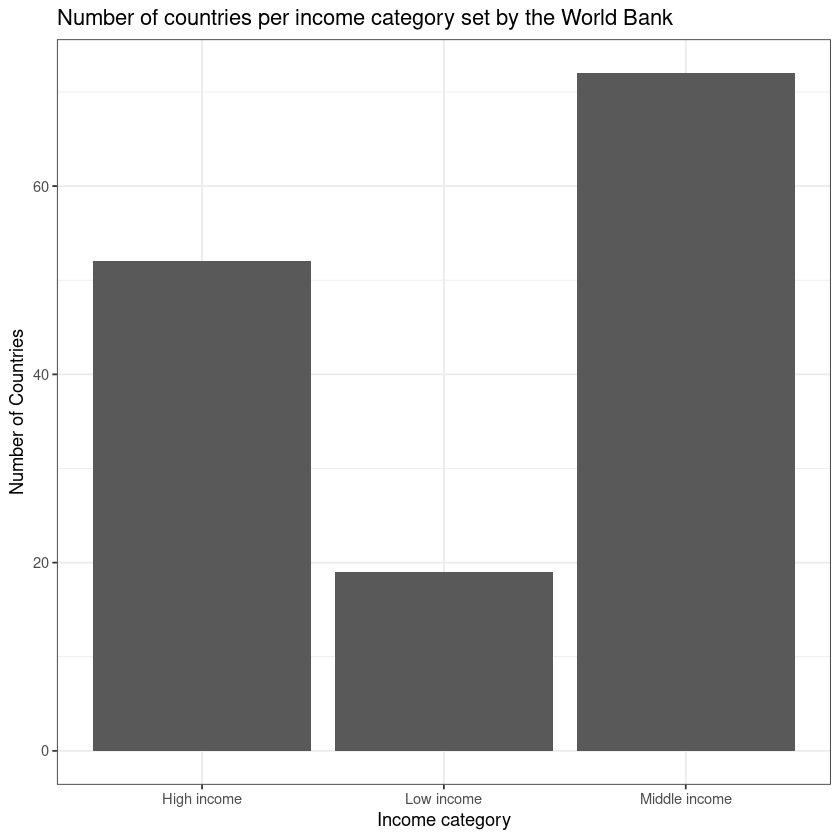

In [56]:
merged_df %>% group_by(income_cat) %>% summarize(countries = n()) %>% ggplot(aes(income_cat,countries)) + theme_bw() + geom_bar(stat = 'identity') + xlab('Income category') + ylab('Number of Countries') + ggtitle('Number of countries per income category set by the World Bank')

3. Aggregate (sum) the number cases and deaths by income category. What kind of countries are most affected

In [90]:
cat_most_affected = merged_df %>% group_by(income_cat) %>% summarize( total_covid_cases = sum(total_cases = Cases + Deaths))
paste('The countries in the ',tolower(cat_most_affected$income_cat[which(cat_most_affected$total_covid_cases == max(cat_most_affected$total_covid_cases))]),'category are affected the most')

[1] "The countries in the  high income category are affected the most"